In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data_UW = pickle.load(f)

In [3]:
data_UW

{'stim': array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625]),
 'rho': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)}

In [4]:
stim= data_UW['stim'] # stimulation vector
rho = data_UW['rho'] # spike train, 1 if spike, 0 if no spike

In [5]:
sampling_rate = 500 # Hz
# Length of the signal
signal_length = len(stim)
frequency_resolution = sampling_rate / signal_length
duration = signal_length / sampling_rate
sampling_period = int(1 / sampling_rate *1000)

In [6]:
window_length = 300 # milliseconds
num_timesteps = int(window_length / sampling_period)
num_timesteps

150

In [7]:
def compute_sta(stim, rho, num_timesteps):
    sta = np.zeros(num_timesteps)
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    num_spikes = len(spike_times)
    for spike_time in spike_times:
        sta += stim[spike_time-num_timesteps:spike_time]
    sta /= num_spikes
    return sta

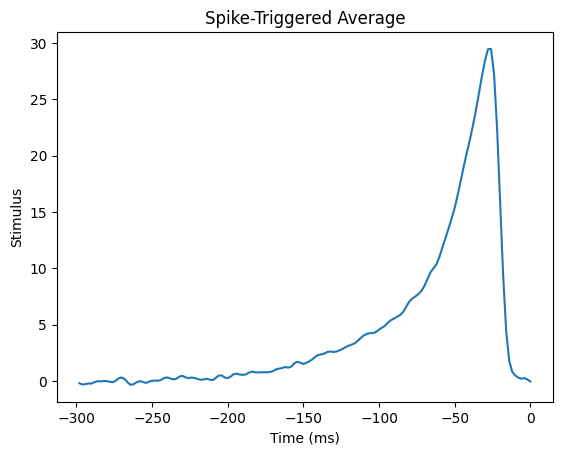

In [8]:
spike_triggered_average = compute_sta(stim, rho, num_timesteps)
time=(np.arange(-num_timesteps,0) + 1) * sampling_period # converts sequence of indices to time values
plt.plot(time, spike_triggered_average)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')

plt.show()
